# Environmental Impact Analysis
### using Air and Water

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import geopandas as gpd

# Air Quality Analyis

In [4]:
sample_data = pd.read_csv('data.csv', nrows=100, encoding='unicode_escape')
print(sample_data.dtypes)

# Specify data types based on inspection
dtype_dict = {
    'stn_code': str,
    'sampling_date': str,  
    'state': str,
    'location': str,
    'agency': str,
    'type': str,
    'so2': float,
    'no2': float,
    'rspm': float,
    'spm': float,
    'location_monitoring_station': str,
    'pm2_5': float,
    'date': str  
}

# Read the full CSV with specified data types
data = pd.read_csv('data.csv', dtype=dtype_dict, encoding='unicode_escape')


stn_code                         int64
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station    float64
pm2_5                          float64
date                            object
dtype: object


In [5]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
data['sampling_date'] = pd.to_datetime(data['sampling_date'])
data['date'] = pd.to_datetime(data['date'])

In [10]:
print(data.head())
print(data.dtypes)

  stn_code sampling_date           state   location agency  \
0      150           NaT  Andhra Pradesh  Hyderabad    NaN   
1      151           NaT  Andhra Pradesh  Hyderabad    NaN   
2      152           NaT  Andhra Pradesh  Hyderabad    NaN   
3      150           NaT  Andhra Pradesh  Hyderabad    NaN   
4      151           NaT  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5       date  
0                         NaN    NaN 1990-02-01  
1                         NaN    NaN 1990-02-01  
2                         NaN    NaN 1990-02-01  
3                         NaN    NaN 1990-03-01 

#### Descriptive statistics for key pollutants

In [11]:
pollutants = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
desc_stats = data[pollutants].describe()
print(desc_stats)

                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000


#### Time Series Analysis

In [12]:
data.set_index('sampling_date', inplace=True)

In [19]:
numeric_data = data[pollutants]

In [21]:
monthly_data = numeric_data.resample('ME').mean()


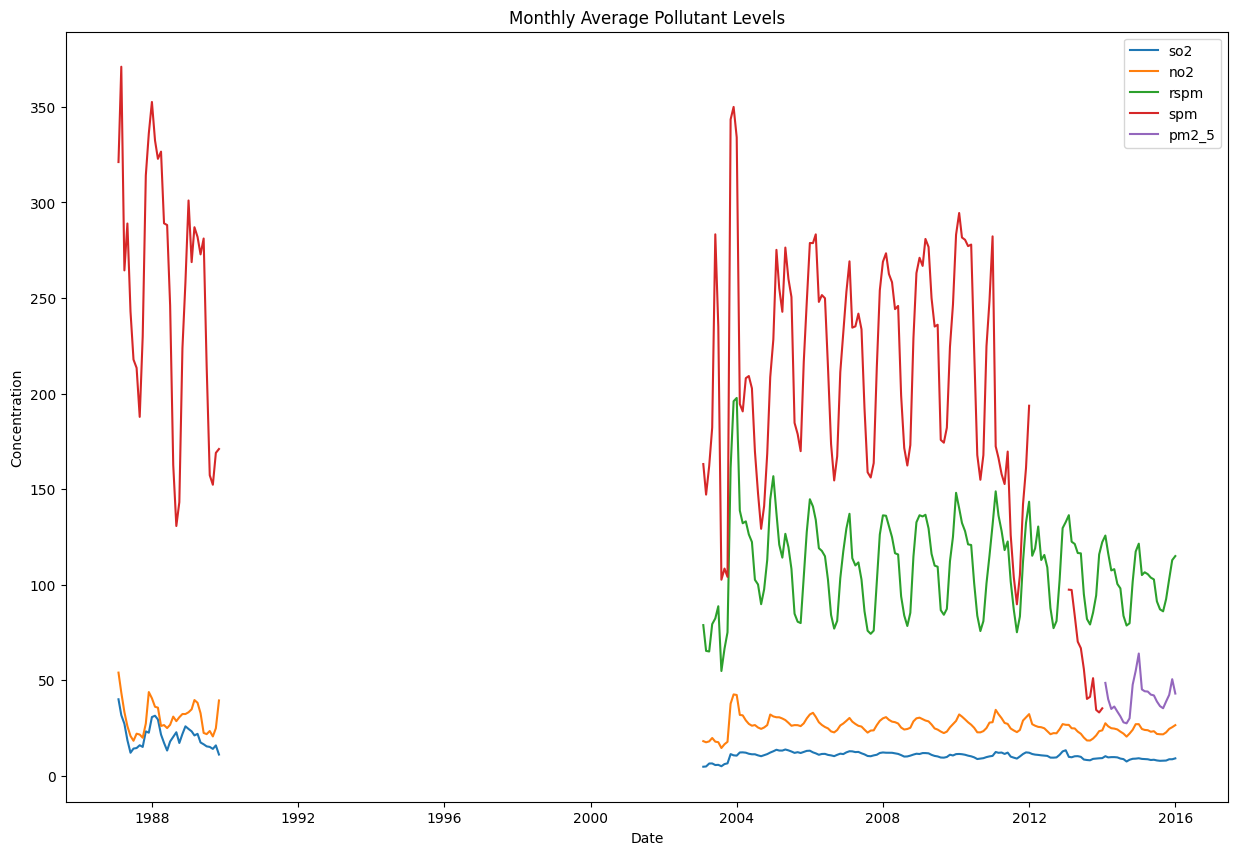

In [22]:
plt.figure(figsize=(15, 10))
for pollutant in pollutants:
    plt.plot(monthly_data[pollutant], label=pollutant)
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Monthly Average Pollutant Levels')
plt.legend()
plt.show()

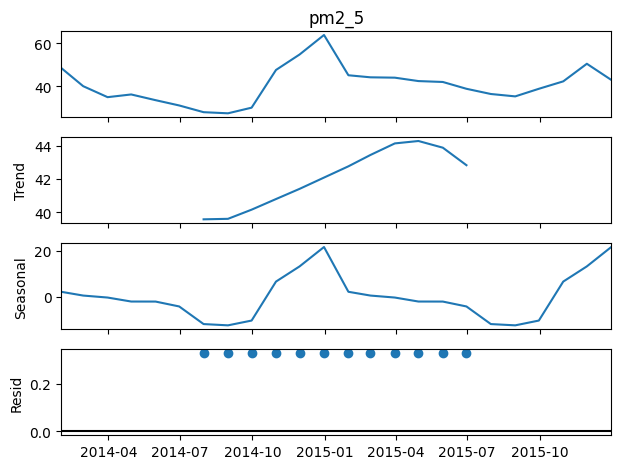

In [30]:
decomposition = seasonal_decompose(monthly_data['pm2_5'].dropna(), model='additive')
decomposition.plot()
plt.show()

#### Correlation Analysis

In [31]:
#correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

            so2       no2      rspm       spm     pm2_5
so2    1.000000  0.340555  0.165325  0.148325  0.035980
no2    0.340555  1.000000  0.369923  0.326170  0.509357
rspm   0.165325  0.369923  1.000000  0.801752  0.754709
spm    0.148325  0.326170  0.801752  1.000000       NaN
pm2_5  0.035980  0.509357  0.754709       NaN  1.000000


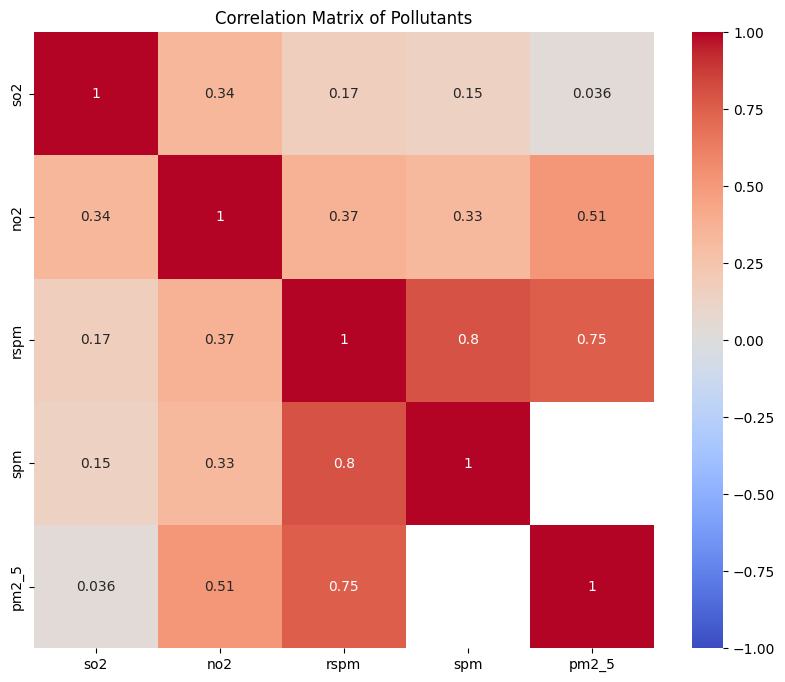

In [32]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()

#### Comparative Analysis

In [33]:
# Hypothetical air quality standards (in µg/m³)
standards = {
    'so2': 50,
    'no2': 40,
    'rspm': 100,
    'spm': 200,
    'pm2_5': 60
}

In [34]:
# Calculate the percentage of records exceeding the standards
exceedances = {}
for pollutant, standard in standards.items():
    exceedances[pollutant] = (numeric_data[pollutant] > standard).mean() * 100

print("Percentage of records exceeding standards:")
print(exceedances)

Percentage of records exceeding standards:
{'so2': np.float64(0.8525687218583473), 'no2': np.float64(13.751256477456844), 'rspm': np.float64(39.189245011956615), 'spm': np.float64(20.80887314052811), 'pm2_5': np.float64(0.3451583735329622)}


#### Visualization of Exceedances

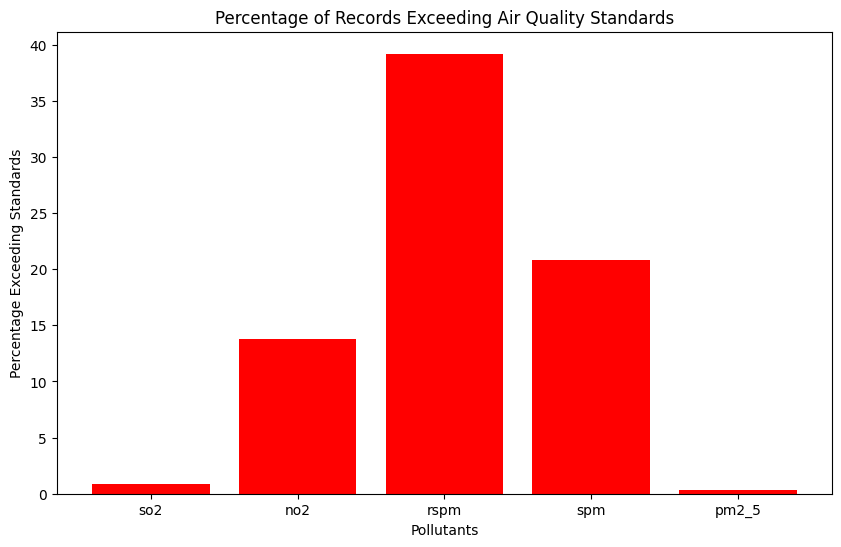

In [35]:
# Bar plot of exceedances
plt.figure(figsize=(10, 6))
plt.bar(exceedances.keys(), exceedances.values(), color='red')
plt.xlabel('Pollutants')
plt.ylabel('Percentage Exceeding Standards')
plt.title('Percentage of Records Exceeding Air Quality Standards')
plt.show()

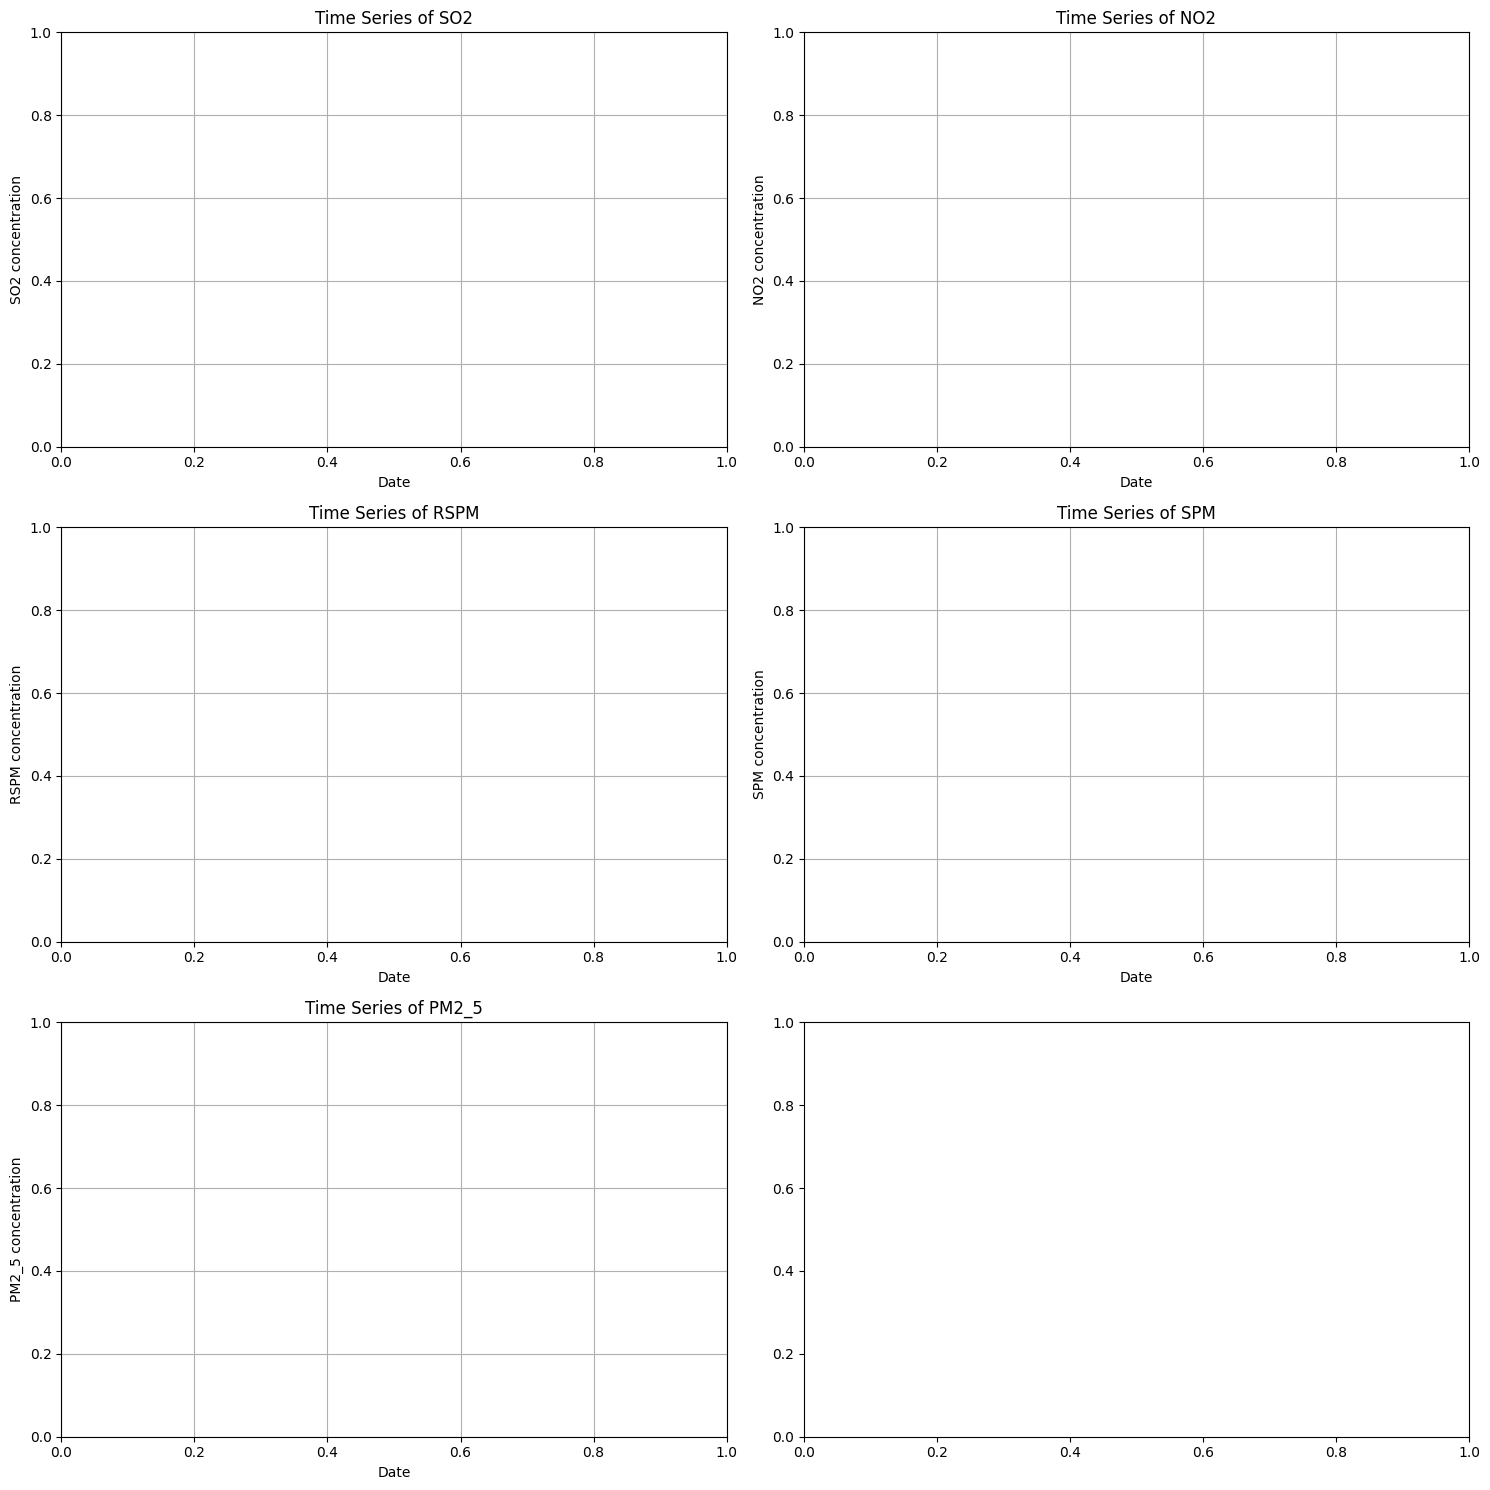

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

pollutants = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
for i, pollutant in enumerate(pollutants):
    ax[i//2, i%2].set_title(f'Time Series of {pollutant.upper()}')
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel(f'{pollutant.upper()} concentration')
    ax[i//2, i%2].grid(True)

plt.tight_layout()
plt.show()

## Conlcusion

*The analysis of the air quality data revealed the following key insights:*
1. The mean concentrations of SO2, NO2, RSPM, SPM, and PM2.5 are generally within permissible limits, but there are significant variations.
2. Seasonal trends were observed in the time series analysis, indicating higher pollutant levels during certain periods.
3. The correlation analysis showed that RSPM and SPM are highly correlated, suggesting common sources or influencing factors.
4. A significant number of exceedances were noted for RSPM and SPM, indicating potential health risks and the need for mitigation measures.

# Water Quality Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import geopandas as gpd
data = pd.read_csv('water_dataX.csv' ,encoding='unicode_escape')

In [5]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [6]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [16]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64


In [25]:
numeric_columns = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 
                   'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 
                   'TOTAL COLIFORM (MPN/100ml)Mean']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [26]:
missing_values_after_conversion = data.isnull().sum()
print("Missing values after conversion:\n", missing_values_after_conversion)

Missing values after conversion:
 STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64


In [27]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [28]:
data['year'] = pd.to_datetime(data['year'], format='%Y')

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   STATION CODE                      1991 non-null   object        
 1   LOCATIONS                         1991 non-null   object        
 2   STATE                             1991 non-null   object        
 3   Temp                              1991 non-null   float64       
 4   D.O. (mg/l)                       1991 non-null   float64       
 5   PH                                1991 non-null   float64       
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   float64       
 7   B.O.D. (mg/l)                     1991 non-null   float64       
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   float64       
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   float64       
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null 

#### Basic descriptive statistics for the key water quality parameters.

In [30]:
desc_stats = data[['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 
                   'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 
                   'TOTAL COLIFORM (MPN/100ml)Mean']].describe()

# Display descriptive statistics
print("Descriptive statistics:\n", desc_stats)

Descriptive statistics:
               Temp  D.O. (mg/l)            PH  CONDUCTIVITY (µmhos/cm)  \
count  1991.000000  1991.000000   1991.000000              1991.000000   
mean     26.209814     6.392637    112.090674              1786.466394   
std       3.287652     1.322515   1875.150167              5517.289887   
min      10.000000     0.000000      0.000000                 0.400000   
25%      25.000000     5.950000      6.900000                79.000000   
50%      27.000000     6.700000      7.300000               187.630000   
75%      28.300000     7.200000      7.700000               620.500000   
max      35.000000    11.400000  67115.000000             65700.000000   

       B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l)  \
count    1991.000000                       1991.000000   
mean        6.940049                          1.623079   
std        29.080653                          3.852301   
min         0.100000                          0.000000   
25%         1.2000

####  Trends over time for different water quality parameters.

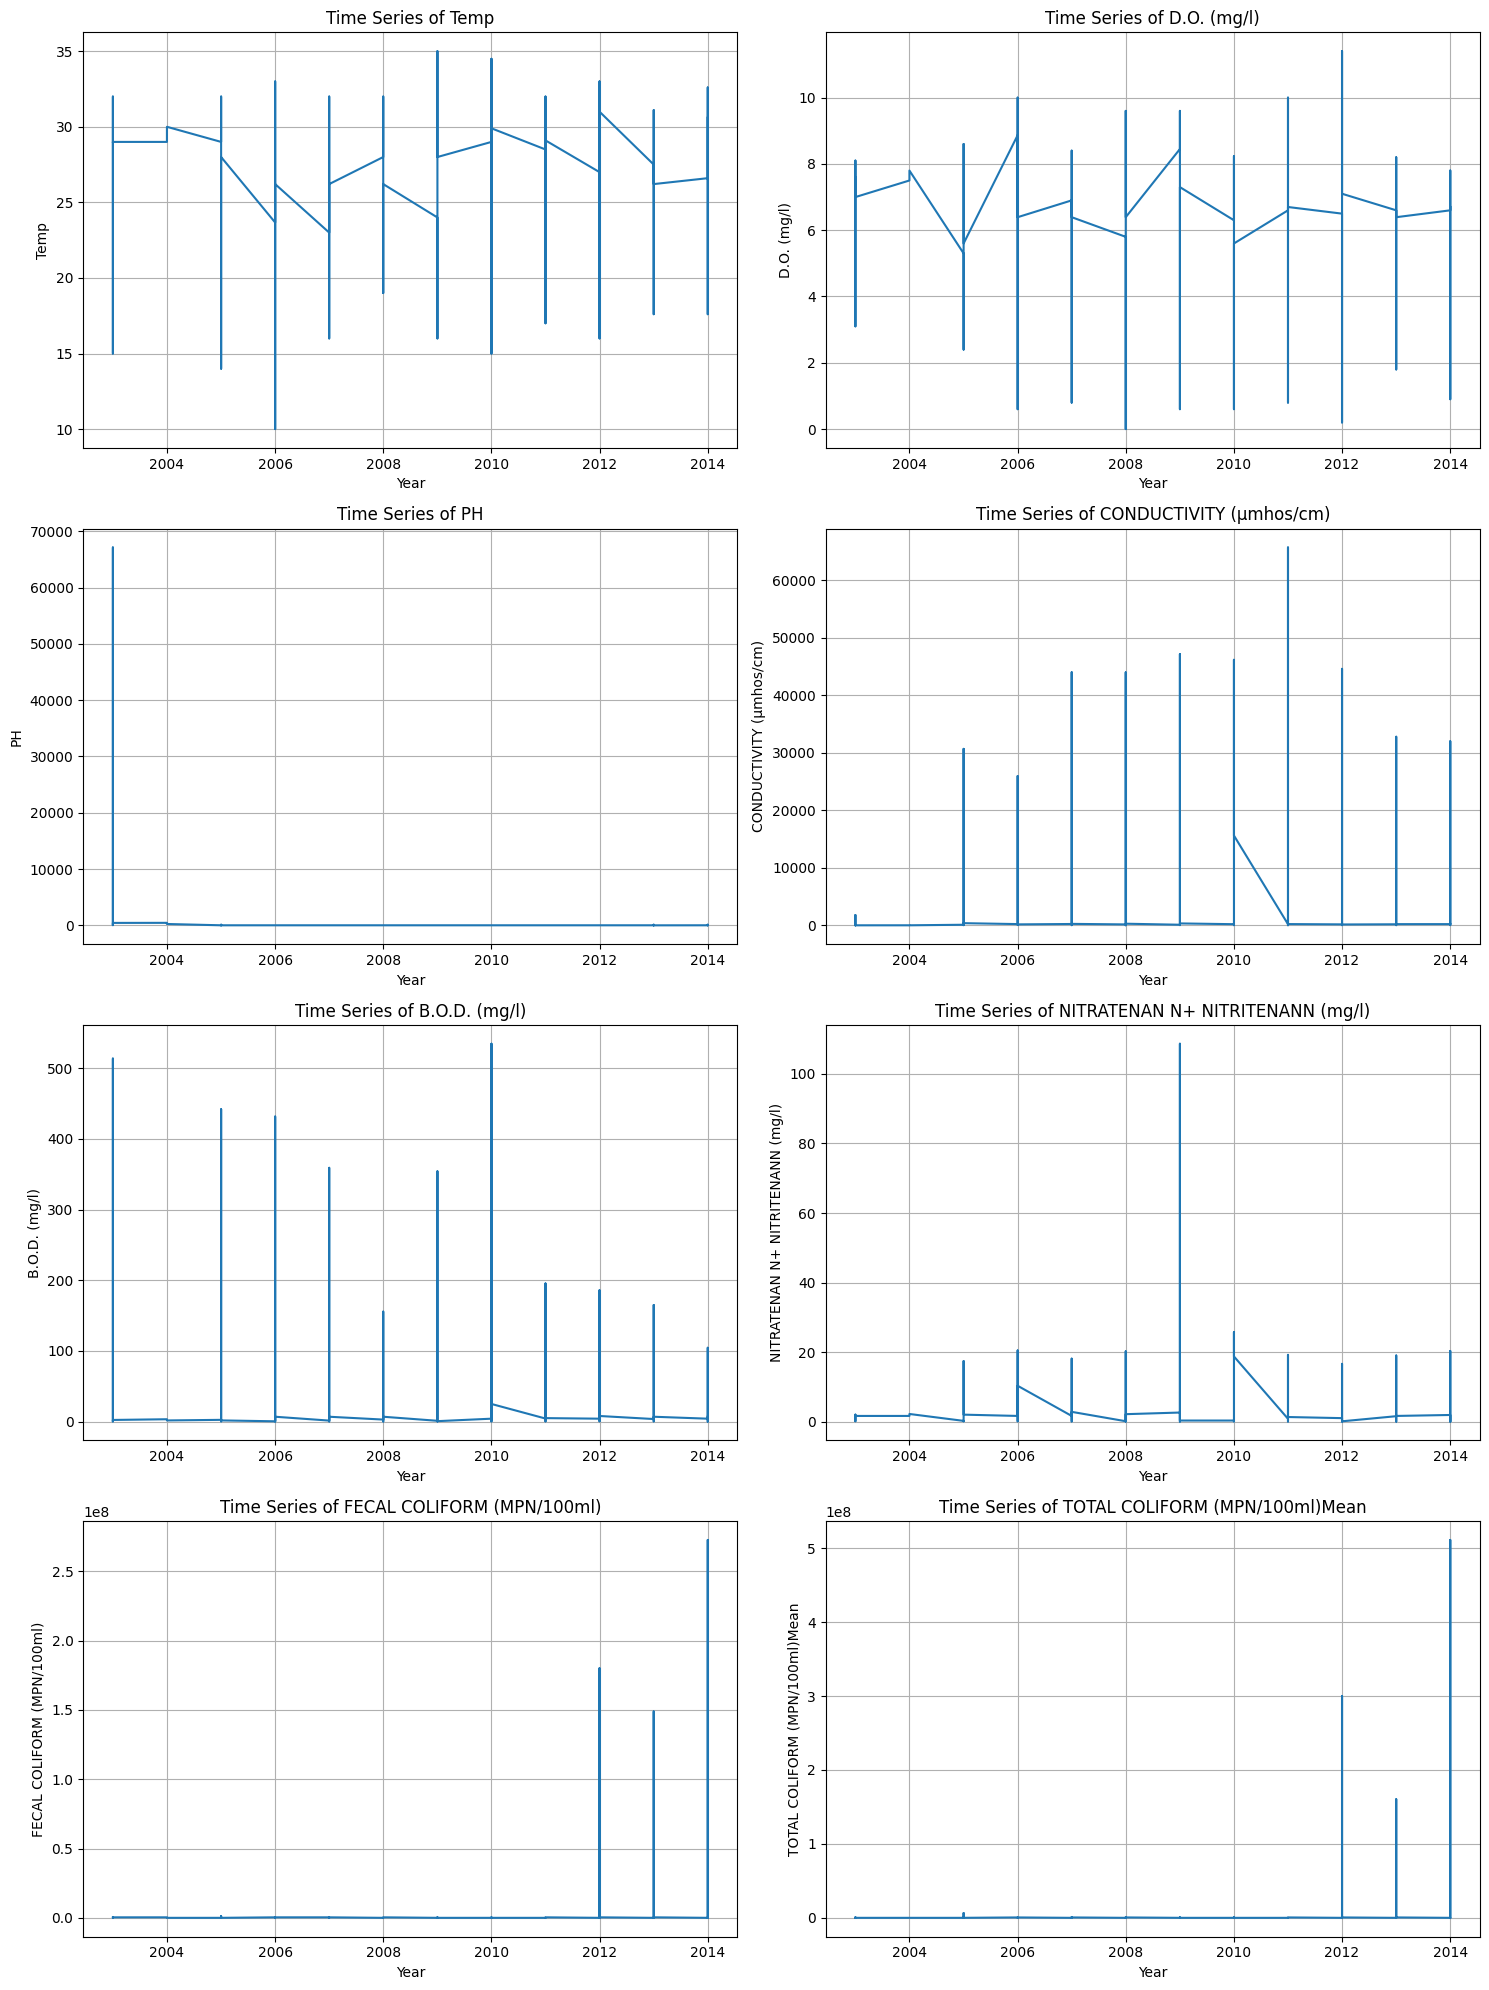

In [31]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

parameters = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 
              'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 
              'TOTAL COLIFORM (MPN/100ml)Mean']
for i, parameter in enumerate(parameters):
    ax[i//2, i%2].plot(data['year'], data[parameter])
    ax[i//2, i%2].set_title(f'Time Series of {parameter}')
    ax[i//2, i%2].set_xlabel('Year')
    ax[i//2, i%2].set_ylabel(parameter)
    ax[i//2, i%2].grid(True)

plt.tight_layout()
plt.show()

#### Correlation between different water quality parameters.

Correlation matrix:
                                       Temp  D.O. (mg/l)        PH  \
Temp                              1.000000     0.025902  0.017260   
D.O. (mg/l)                       0.025902     1.000000  0.034824   
PH                                0.017260     0.034824  1.000000   
CONDUCTIVITY (µmhos/cm)           0.143878    -0.165684 -0.017843   
B.O.D. (mg/l)                    -0.047410    -0.248431  0.041405   
NITRATENAN N+ NITRITENANN (mg/l) -0.213062    -0.190797 -0.006608   
FECAL COLIFORM (MPN/100ml)        0.010102    -0.143419 -0.001191   
TOTAL COLIFORM (MPN/100ml)Mean    0.008768    -0.142953 -0.002123   

                                  CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
Temp                                             0.143878      -0.047410   
D.O. (mg/l)                                     -0.165684      -0.248431   
PH                                              -0.017843       0.041405   
CONDUCTIVITY (µmhos/cm)                          1.00

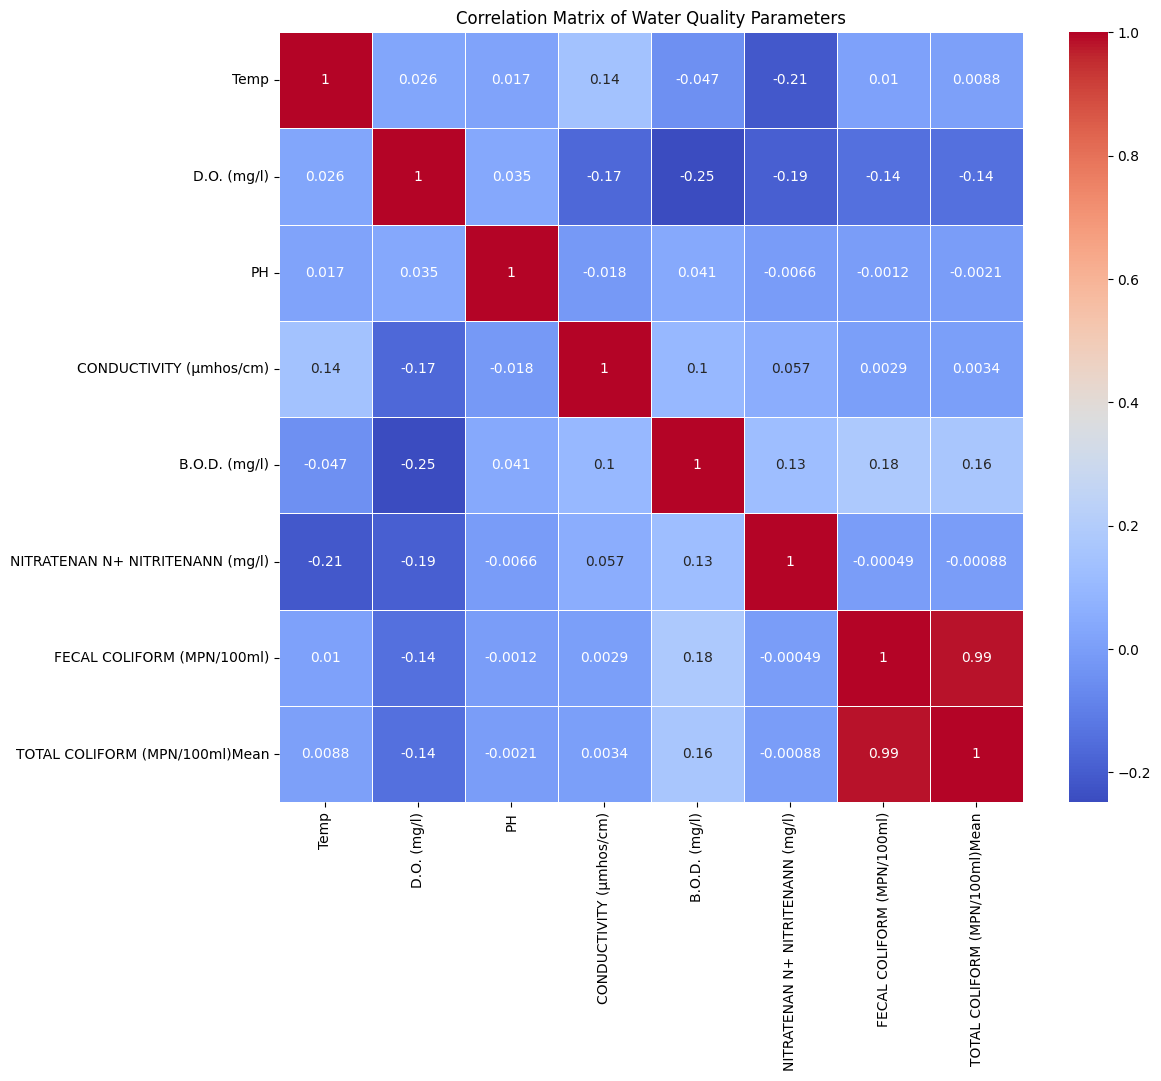

In [32]:
corr_matrix = data[['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 
                    'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 
                    'TOTAL COLIFORM (MPN/100ml)Mean']].corr()

# Display correlation matrix
print("Correlation matrix:\n", corr_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

#### Comparison of Water Quality parameters with National and International Standards

In [33]:
standards = {
    'D.O. (mg/l)': 5,
    'PH': 6.5,
    'CONDUCTIVITY (µmhos/cm)': 300,
    'B.O.D. (mg/l)': 3,
    'NITRATENAN N+ NITRITENANN (mg/l)': 10,
    'FECAL COLIFORM (MPN/100ml)': 1000,
    'TOTAL COLIFORM (MPN/100ml)Mean': 5000
}

# Compare with standards and identify exceedances
exceedances = {parameter: (data[parameter] > limit).sum() for parameter, limit in standards.items()}

# Display exceedances
print("Number of exceedances for each parameter:\n", exceedances)

Number of exceedances for each parameter:
 {'D.O. (mg/l)': np.int64(1742), 'PH': np.int64(1825), 'CONDUCTIVITY (µmhos/cm)': np.int64(759), 'B.O.D. (mg/l)': np.int64(655), 'NITRATENAN N+ NITRITENANN (mg/l)': np.int64(55), 'FECAL COLIFORM (MPN/100ml)': np.int64(732), 'TOTAL COLIFORM (MPN/100ml)Mean': np.int64(404)}


### Conclusion
1. The mean concentrations of various water quality parameters are generally within permissible limits, but there are significant variations.
2. Seasonal trends were observed in the time series analysis, indicating fluctuations in water quality during certain periods.
3. The correlation analysis showed significant relationships between certain parameters, suggesting common sources or influencing factors.
4. A significant number of exceedances were noted for parameters like BOD, nitrate/nitrite, and coliform bacteria, indicating potential health risks and the need for mitigation measures.